In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Use pandas to create a Series from the following data:

["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"]



a. Name the variable that holds the series fruits.



In [178]:
fruits = pd.Series(["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"]
)
print(fruits)
print(type(fruits))

0                 kiwi
1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
9                 kiwi
10                kiwi
11                kiwi
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object
<class 'pandas.core.series.Series'>


b. Run .describe() on the series to see what describe returns for a series of strings.



In [8]:
fruits.describe()

count       17
unique      13
top       kiwi
freq         4
dtype: object

c. Run the code necessary to produce only the unique fruit names.



In [89]:
uniq_fruits = fruits.unique()
print(uniq_fruits)
print("\n")
print("Number of unique fruits: ", len(uniq_fruits))

['kiwi' 'mango' 'strawberry' 'pineapple' 'gala apple' 'honeycrisp apple'
 'tomato' 'watermelon' 'honeydew' 'blueberry' 'blackberry' 'gooseberry'
 'papaya']


Number of unique fruits:  13


d. Determine how many times each value occurs in the series.



In [22]:
fruit_count = fruits.value_counts()
print(fruit_count)
type(fruit_count)

kiwi                4
mango               2
blueberry           1
honeydew            1
pineapple           1
blackberry          1
papaya              1
watermelon          1
strawberry          1
gooseberry          1
honeycrisp apple    1
tomato              1
gala apple          1
dtype: int64


pandas.core.series.Series

e. Determine the most frequently occurring fruit name from the series.



In [31]:
# Note to self...
#Yes! You can work with a Pandas Series like a dictionary with keys, value pairs
fruits.value_counts()["kiwi"]

4

In [150]:
most_freq_fruit = fruit_count.idxmax()
print(most_freq_fruit)

#or fruits.mode()

kiwi


In [158]:
least_freq_fruit = fruit_count.min()

#create a boolean mask True for fruits matching least_freq_fruit
mask = fruit_count == least_freq_fruit
fruit_count[mask]


blueberry           1
honeydew            1
pineapple           1
blackberry          1
papaya              1
watermelon          1
strawberry          1
gooseberry          1
honeycrisp apple    1
tomato              1
gala apple          1
dtype: int64

g. Write the code to get the longest string from the fruits series.



In [173]:
most_freq_fruit = fruit_count.max()
print(most_freq_fruit)
fruit_names = pd.Series(uniq_fruits)
mask = fruit_count == most_freq_fruit


4


h. Find the fruit(s) with 5 or more letters in the name.



In [179]:
# def more_than_five(word):
#     length = len([let for let in word])
#     return length >= 5

# mask = fruits.apply(more_than_five)
# fruits[mask]

#OR

fruits = pd.Series(fruits)
more_than_five = fruits.apply(lambda x: len(x) >= 5)
type(more_than_five)
fruits[more_than_five]


1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

i. Capitalize all the fruit strings in the series.



In [62]:
fruits.apply(lambda s: s.capitalize()) #OR
fruits.str.capitalize()

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala apple
5     Honeycrisp apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

j. Count the letter "a" in all the fruits (use string vectorization)



In [77]:
def count_a(word):
    """count the times the letter 'a'
    appears in a word
    """
    return len([let for let in word if let in "a"])


print(fruits)

individual_count_a = fruits.apply(count_a)
print(individual_count_a)
print("\n")

sum_of_a = fruits.apply(count_a).sum()
print("Count of the letter 'a' in all the fruits:", sum_of_a)

0                 kiwi
1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
9                 kiwi
10                kiwi
11                kiwi
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object
0     0
1     1
2     1
3     1
4     3
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    3
dtype: int64


Count of the letter 'a' in all the fruits: 14


In [182]:
# combining lists using zip()
list(zip(fruits, individual_count_a))

[('kiwi', 0),
 ('mango', 1),
 ('strawberry', 1),
 ('pineapple', 1),
 ('gala apple', 3),
 ('honeycrisp apple', 1),
 ('tomato', 1),
 ('watermelon', 1),
 ('honeydew', 0),
 ('kiwi', 0),
 ('kiwi', 0),
 ('kiwi', 0),
 ('mango', 1),
 ('blueberry', 0),
 ('blackberry', 1),
 ('gooseberry', 0),
 ('papaya', 3)]

In [181]:
# combining lists using a dataframe
df = pd.DataFrame(list(zip(fruits, individual_count_a)))
df.columns = ["fruits", "count of 'a'"]
print(df)

              fruits  count of 'a'
0               kiwi             0
1              mango             1
2         strawberry             1
3          pineapple             1
4         gala apple             3
5   honeycrisp apple             1
6             tomato             1
7         watermelon             1
8           honeydew             0
9               kiwi             0
10              kiwi             0
11              kiwi             0
12             mango             1
13         blueberry             0
14        blackberry             1
15        gooseberry             0
16            papaya             3


k. Output the number of vowels in each and every fruit.



In [90]:
def vowel_count(word):
    return len([let for let in word if let in "aeiou"])

print(fruits.apply(vowel_count))

total_v = sum(fruits.apply(vowel_count))

print("\n")

print("Total vowels in all words in fruits: ", total_v)

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64


Total vowels in all words in fruits:  49


l. Use the .apply method and a lambda function to find the fruit(s) containing two or more "o" letters in the name.

In [73]:
def o_count(word):
    total_o = 0
    for let in word:
        if let == "o":
            total_o += 1
    return total_o

mask = fruits.apply(lambda s: o_count(s) >= 2)
fruits[mask]

6         tomato
15    gooseberry
dtype: object

m. Write the code to get only the fruits containing "berry" in the name



In [130]:
def word_in_word(word, word_part="berry"):
    return word_part in word
    
berry_mask = fruits.apply(word_in_word)
fruits[berry_mask]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

n. Write the code to get only the fruits containing "apple" in the name



In [132]:
def word_in_word(word, word_part="apple"):
    return word_part in word

apple_mask = fruits.apply(word_in_word)
fruits[apple_mask]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

o. Which fruit has the highest amount of vowels?



In [185]:
def vowel_count(word):
    return len([let for let in word if let in "aeiou"])
vowels = fruits.apply(vowel_count)
print(vowels)

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64


2. Use pandas to create a Series from the following data:


['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23']

    What is the data type of the series?

    Use series operations to convert the series to a numeric data type.

    What is the maximum value? The minimum?

    Bin the data into 4 equally sized intervals and show how many values fall into each bin.

    Plot a histogram of the data. Be sure to include a title and axis labels.

In [93]:
money = pd.Series(['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23']
)

In [94]:
money

0       $796,459.41
1           $278.60
2       $482,571.67
3     $4,503,915.98
4      $2,121,418.3
5      $1,260,813.3
6        $87,231.01
7     $1,509,175.45
8     $4,138,548.00
9     $2,848,913.80
10      $594,715.39
11    $4,789,988.17
12     $4,513,644.5
13    $3,191,059.97
14    $1,758,712.24
15    $4,338,283.54
16    $4,738,303.38
17    $2,791,759.67
18      $769,681.94
19      $452,650.23
dtype: object

In [97]:
money.dtype

dtype('O')

In [109]:
f_money = money.str.replace("$", "").str.replace(",", "_").astype("float")
print(f_money)


0      796459.41
1         278.60
2      482571.67
3     4503915.98
4     2121418.30
5     1260813.30
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12    4513644.50
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: float64


In [112]:
max_f_money = f_money.max()
print(max_f_money)

4789988.17


In [113]:
min_f_money = f_money.min()
print(min_f_money)

278.6


In [117]:
binned_money = pd.cut(f_money, 4)
print(binned_money)
binned_money.value_counts()

0        (-4511.11, 1197705.993]
1        (-4511.11, 1197705.993]
2        (-4511.11, 1197705.993]
3      (3592560.778, 4789988.17]
4     (1197705.993, 2395133.385]
5     (1197705.993, 2395133.385]
6        (-4511.11, 1197705.993]
7     (1197705.993, 2395133.385]
8      (3592560.778, 4789988.17]
9     (2395133.385, 3592560.778]
10       (-4511.11, 1197705.993]
11     (3592560.778, 4789988.17]
12     (3592560.778, 4789988.17]
13    (2395133.385, 3592560.778]
14    (1197705.993, 2395133.385]
15     (3592560.778, 4789988.17]
16     (3592560.778, 4789988.17]
17    (2395133.385, 3592560.778]
18       (-4511.11, 1197705.993]
19       (-4511.11, 1197705.993]
dtype: category
Categories (4, interval[float64]): [(-4511.11, 1197705.993] < (1197705.993, 2395133.385] < (2395133.385, 3592560.778] < (3592560.778, 4789988.17]]


(-4511.11, 1197705.993]       7
(3592560.778, 4789988.17]     6
(1197705.993, 2395133.385]    4
(2395133.385, 3592560.778]    3
dtype: int64

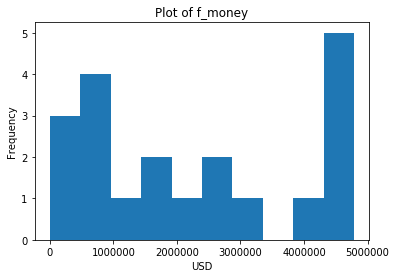

In [125]:
f_money.plot.hist()

plt.xlabel('USD')
plt.ylabel("")
plt.title("Plot of f_money")
plt.show()

3. Use pandas to create a Series from the following exam scores:


[60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78]

    What is the minimum exam score? The max, mean, median?

    Plot a histogram of the scores.

    Convert each of the numbers above into a letter grade. For example, 86 
    should be a 'B' and 95 should be an 'A'.

    Write the code necessary to implement a curve. I.e. that grade closest to 

    100 should be converted to a 100, and that many points should be given to every other score as well.

In [188]:
grades = pd.Series([60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78]
)

In [190]:
lowest_score = grades.min()
print(lowest_score)

60


In [191]:
highest_score = grades.max()
print(highest_score)

96


In [202]:
median_score = grades.median()
print(median_score)

79.0


In [208]:
diff = 100 - highest_score

curved_grades = grades + 4
print(curved_grades)

0      64
1      90
2      79
3      66
4      97
5      75
6      64
7      87
8      99
9      82
10     69
11     76
12     73
13     85
14    100
15     84
16     89
17     96
18     86
19     82
dtype: int64


In [209]:
binned_grades = pd.cut(curved_grades, [0, 60, 70, 80, 90, 100], labels=["F", "D", "C", "B", "A"])
binned_grades

0     D
1     B
2     C
3     D
4     A
5     C
6     D
7     B
8     A
9     B
10    D
11    C
12    C
13    B
14    A
15    B
16    B
17    A
18    B
19    B
dtype: category
Categories (5, object): [F < D < C < B < A]

Text(0.5, 1.0, 'Exam Grades')

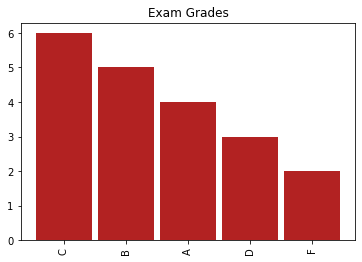

In [201]:
binned_grades.value_counts().plot.bar(color='firebrick', width=.9)
plt.title("Exam Grades")

4. Use pandas to create a Series from the following string:


'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'

    What is the most frequently occuring letter? Least frequently occuring?
    
    How many vowels are in the list?
    
    How many consonants are in the list?
    
    Create a series that has all of the same letters, but uppercased
    
    Create a bar plot of the frequencies of the 6 most frequently occuring letters.

In [243]:
string = pd.Series(list('hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'
))
string.name = "letters"
string

0      h
1      n
2      v
3      i
4      d
5      d
6      u
7      c
8      k
9      k
10     q
11     x
12     w
13     y
14     m
15     b
16     i
17     m
18     k
19     c
20     c
21     e
22     x
23     b
24     k
25     m
26     q
27     y
28     g
29     k
      ..
170    g
171    j
172    w
173    u
174    p
175    g
176    z
177    h
178    i
179    o
180    f
181    o
182    h
183    a
184    w
185    y
186    t
187    l
188    s
189    i
190    y
191    e
192    c
193    u
194    p
195    r
196    o
197    g
198    u
199    y
Name: letters, Length: 200, dtype: object

In [245]:
most_freq_letter = string.max()
print(most_freq_letter)

z


In [244]:
least_freq_letter = string.min()
print(least_freq_letter)

a


In [225]:
def cons(let):
    return let not in "aeiou"

cons_mask = string.apply(cons)
cons_in_list = sum(cons_mask)
print(cons_in_list)

166


In [246]:
string.str.upper()

0      H
1      N
2      V
3      I
4      D
5      D
6      U
7      C
8      K
9      K
10     Q
11     X
12     W
13     Y
14     M
15     B
16     I
17     M
18     K
19     C
20     C
21     E
22     X
23     B
24     K
25     M
26     Q
27     Y
28     G
29     K
      ..
170    G
171    J
172    W
173    U
174    P
175    G
176    Z
177    H
178    I
179    O
180    F
181    O
182    H
183    A
184    W
185    Y
186    T
187    L
188    S
189    I
190    Y
191    E
192    C
193    U
194    P
195    R
196    O
197    G
198    U
199    Y
Name: letters, Length: 200, dtype: object

In [234]:
string_count = string.value_counts()
top_six_mask = string_count >= 9
top_six = string_count[top_six_mask]
top_six

y    13
p    12
w    10
n     9
k     9
m     9
b     9
dtype: int64

Text(0, 0.5, 'Frequency')

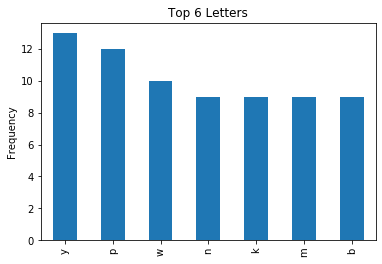

In [241]:
top_six.plot.bar()
plt.title("Top 6 Letters")
plt.ylabel("Frequency")